This imports the the packages required.
    csv is used to read the data.
    matplotlib.pyplot is a commonly used packaged to visualize data using Python.
    
It works with files that are in a format like the data for actone for example. That is, a single column of wavenumbers and a single column of absorption intensity values, with no additional heading or columns.

If your data is not like, this you can reformat it so it work (probably easier) or edit the function below so it works for the format you have your data in.

Tip: If you need to add or remove columns of data, it can be useful to use a text editor with a block highlight feature. This lets you highlight boxes of text rather than lines.

You might also want to edit the range of your y values (in the function below) incase they are on a different scale to the one that is plotted. 

In [37]:
import csv
import matplotlib.pyplot as plt

This defines a function which will plot the data. It takes two arguments: <br>
    &emsp; filepath is the path to the file which contains the data. <br>
    &emsp; save is a boolean value that dictates whether the image of the spectrum should be saved locally. <br>
    
<br>

You might need to change the delimited value in the csv.reader function depending on what delimited your data uses.


In [44]:
def plot_ir(filepath, save, predicted):
    wavenumbers = []
    intensities = []
    with open(filepath, "r") as stream:
        values = csv.reader(stream, delimiter = "\t")
        for i in values:
            wavenumbers.append(float(i[0]))
            #might want to divide each intensity by 100 if the data is a %
            intensities.append(float(i[1]) / 100)
    ymin = min(intensities) - 0.1
    plt.figure(figsize = (16,10))
    plt.plot(wavenumbers, intensities, color = "black", label = predicted)
    plt.legend(loc = 3, fontsize = 14)
    plt.grid(True, linewidth = 0.5, linestyle = "--")
    plt.ylim(ymin,1.05)
    plt.xlim(max(wavenumbers),min(wavenumbers))
    plt.ylabel("Absorption Intensity", fontsize = 16)
    plt.xlabel("Wavenumber / $cm^-$$^1$", fontsize = 16)
    if save:
        plt.savefig(filepath[:-3] + "png")

Add the files containing the data to their own folder and name them in the same way the ones currently there are.
Run this cell and input the name of the molecule (in the way that it appears in the folder) <br>
This will generate the correct filepath to the data.

In [45]:
molecule = input("Molecule Name: ")
filepath = "./" + molecule + "/" + molecule + "_ir.txt"

Molecule Name: h2o


Finally, run this cell to create the figure. <br>

If the data has been generated experimentally, then put "experimental" as the last argument else put "predicted"

It will automatically save the spectrum in the same folder as the file with the data in.

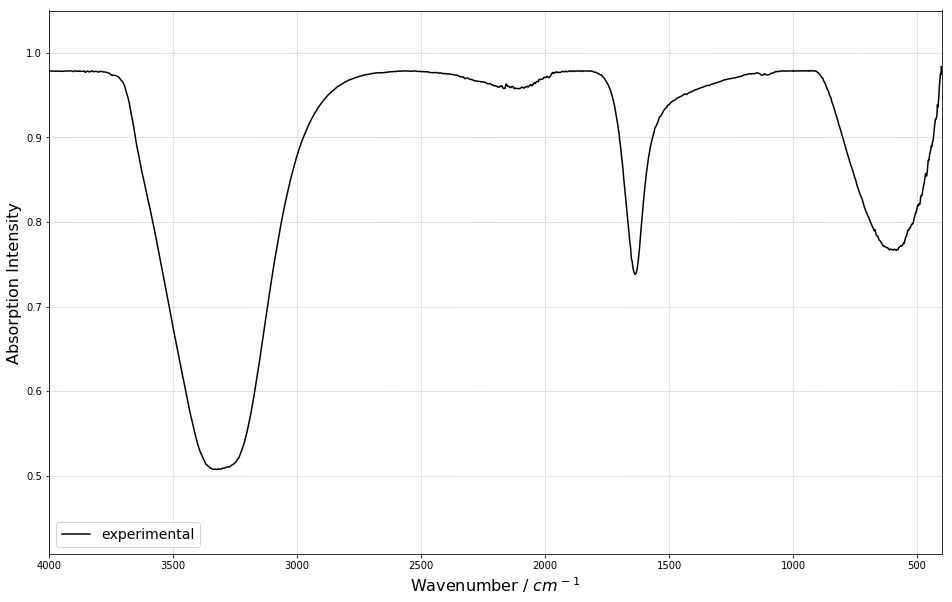

In [46]:
plot_ir(filepath, True, "experimental")